# Cricket_Chirping_Task

Ground Cricket Chirps
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

Tasks:
1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

# Importing Necessary Libraries 

In [1148]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

# Dataset 

In [1149]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


# Data Cleaning

In [1150]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [1151]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [1152]:
IQR = df["Chirps/Second"].quantile(0.75) - df["Chirps/Second"].quantile(0.25)
Upper_limit = df["Chirps/Second"].quantile(0.75) + (1.5 * IQR)
Lower_limit = df["Chirps/Second"].quantile(0.75) - (1.5 * IQR)
Upper_limit, Lower_limit

(19.699999999999996, 14.6)

In [1153]:
df = df.drop_duplicates()
df.shape

(15, 2)

In [1154]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

# EDA

<AxesSubplot: xlabel='Chirps/Second', ylabel='Ground Temperature'>

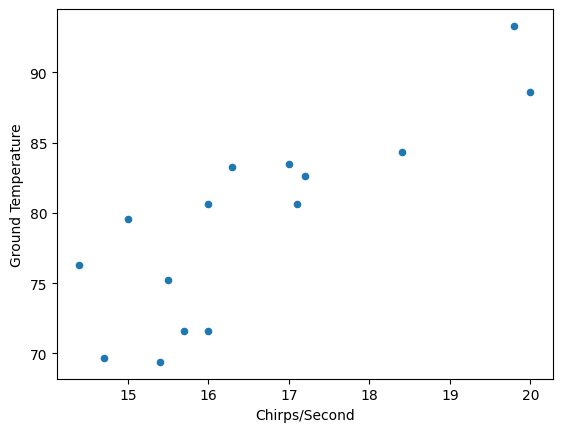

In [1155]:
df.plot("Chirps/Second", "Ground Temperature", kind="scatter")

In [1156]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


# Splitting of Dataset 

In [1157]:
from sklearn.model_selection import train_test_split 
x = df.loc[:,["Chirps/Second"]].values
y = df.loc[:,"Ground Temperature"].values
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3)

# Model

In [1158]:
from sklearn.linear_model import LinearRegression

In [1159]:
cursor = LinearRegression()

In [1160]:
cursor.fit(train_x,train_y)

LinearRegression()

In [1161]:
cursor.intercept_

34.46499118165786

In [1162]:
cursor.coef_ 


array([2.68694885])

## 1. Linear Regression Equation

In [1163]:
# y = (2.686)*("Chirps/Second") + 34.465

In [1164]:
cursor.predict([[15.4]])

array([75.84400353])

In [1165]:
y_pred = cursor.predict(test_x)

In [1166]:
y_pred

array([80.14312169, 88.20396825, 83.90485009, 87.66657848, 73.96313933])

# Actual vs Predicted

In [1167]:
dff = pd.DataFrame({"Actual":test_y, "Predicted":y_pred})

In [1168]:
dff.sort_values(by="Actual")

,Actual,Predicted
4,69.7,73.963139
0,83.5,80.143122
2,84.3,83.904850
1,88.6,88.203968
3,93.3,87.666578


## 2. Chart the original data and the equation on the chart 

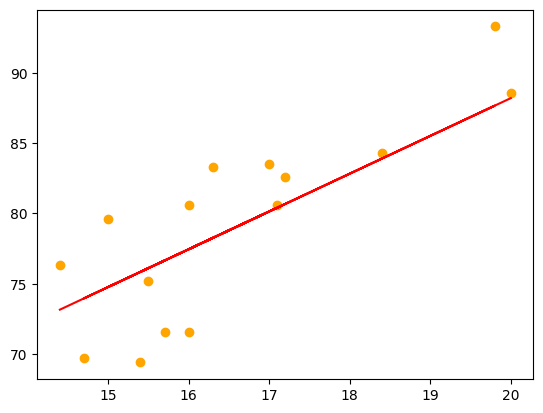

In [1169]:
plt.scatter(x,y, color="orange")
plt.plot(x, cursor.predict(x), color="red")

## 3. Evaluation Metrics : R2 Score

In [1170]:
from sklearn import metrics
s= cursor.score(test_x, test_y)

In [1172]:
print("The R2-Score of this model is",s)

The R2-Score of this model is 0.8031695363286505


## 4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [1173]:
y = 95
X = (y - cursor.intercept_)/cursor.coef_
print("The approximate Chirps/Second is",*X)

The approximate Chirps/Second is 22.52927469642271


## 5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning? 

In [1174]:
Y = cursor.predict([[18]])
print("The approximate Ground Temperature is",*Y)

The approximate Ground Temperature is 82.8300705467372
